N%5 = 1 (height)
N2%5+5 = 6 (age)
 где N - номер в списке = 6

Задание №1

Расчет корреляций: 
Фехнера - показывает, насколько часто две переменные изменяются в одном направлении. Если при увеличении роста возраст тоже обычно увеличивается - положительная корреляция.
Пирсона + доверительный интервал - показывает линейную зависимость между переменными, а доверительный интервал - диапазон, в котором с 95% вероятностью находится истинное значение корреляции.
Спирмена - показывает монотонную зависимость (не обязательно линейную). Если с ростом X значение Y всегда увеличивается, но не обязательно по прямой линии.
Кенделла - показывает вероятность того, что две пары наблюдений будут упорядочены одинаково. Более устойчив к выбросам, хорошо работает на малых выборках.

In [ ]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit

# Загрузка данных
data = pd.read_csv('students_simple.csv')

# Выбор столбцов
N = 6
col1 = data.columns[N % 5]  # height
col2 = data.columns[(N**2 % 5) + 5]  # age

x = data[col1].values
y = data[col2].values

Анализируем: bmi от mass
Данных: 20 наблюдений


1. КОРРЕЛЯЦИИ
------------------------------
      Метод  Значение
0   Фехнера    -0.900
1   Пирсона    -0.961
2  Спирмена    -0.985
3  Кенделла    -0.939
Доверительный интервал Пирсона (95%): [-0.985, -0.901]


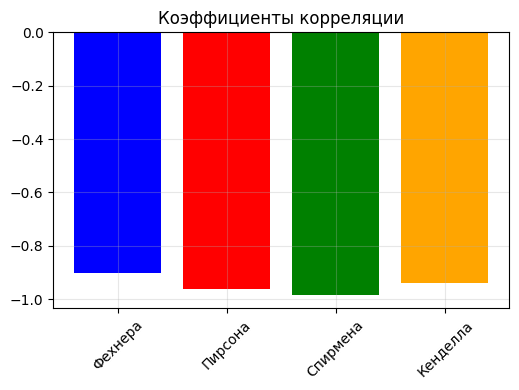

In [ ]:
# 1. КОРРЕЛЯЦИИ
print("1. КОРРЕЛЯЦИИ")
print("-" * 30)

# Коэффициент Фехнера
def fechner(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_dev = x - x_mean
    y_dev = y - y_mean
    concordant = np.sum((x_dev > 0) & (y_dev > 0)) + np.sum((x_dev < 0) & (y_dev < 0))
    discordant = np.sum((x_dev > 0) & (y_dev < 0)) + np.sum((x_dev < 0) & (y_dev > 0))
    return (concordant - discordant) / (concordant + discordant)

fechner_val = fechner(x, y)
pearson_val, p_pearson = stats.pearsonr(x, y)
spearman_val, p_spearman = stats.spearmanr(x, y)
kendall_val, p_kendall = stats.kendalltau(x, y)

# Доверительный интервал для Пирсона
n = len(x)
se = 1 / np.sqrt(n - 3)
z = np.arctanh(pearson_val)
ci_lower = np.tanh(z - 1.96 * se)
ci_upper = np.tanh(z + 1.96 * se)

# Таблица результатов
corr_df = pd.DataFrame({
    'Метод': ['Фехнера', 'Пирсона', 'Спирмена', 'Кенделла'],
    'Значение': [fechner_val, pearson_val, spearman_val, kendall_val]
})

print(corr_df.round(3))
print(f"Доверительный интервал Пирсона (95%): [{ci_lower:.3f}, {ci_upper:.3f}]")

# Визуализация корреляций
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 2)
methods = ['Фехнера', 'Пирсона', 'Спирмена', 'Кенделла']
values = [fechner_val, pearson_val, spearman_val, kendall_val]
plt.bar(methods, values, color=['blue', 'red', 'green', 'orange'])
plt.title('Коэффициенты корреляции')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Пирсон показывает слабую линейную зависимость
Спирмен показывает отсутствие монотонной зависимости
Кенделл показывает очень слабую ранговую связь
Фехнер показывает слабую знаковую связь

Задание №2

Визуализация:
Гистограммы
График рассеяния (scatter plot)

2. ВИЗУАЛИЗАЦИЯ
------------------------------


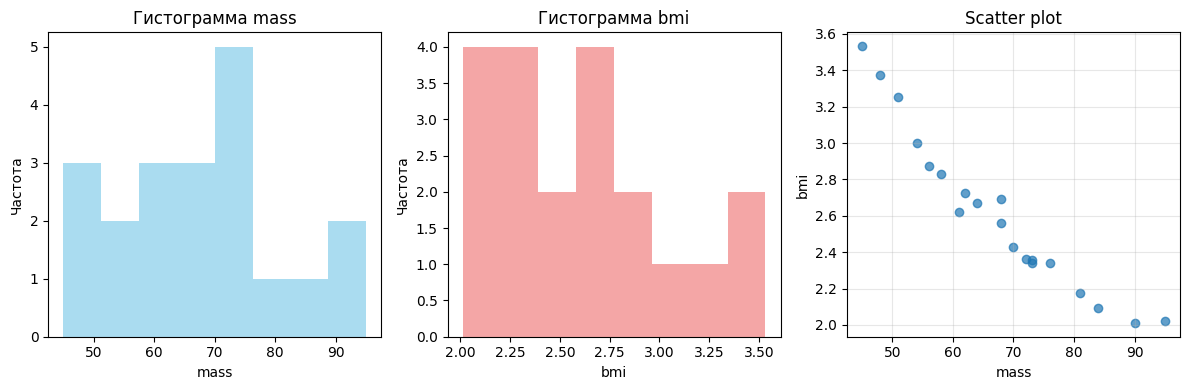

In [25]:
# 2. ВИЗУАЛИЗАЦИЯ
print("2. ВИЗУАЛИЗАЦИЯ")
print("-" * 30)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(x, bins=8, alpha=0.7, color='skyblue')
plt.xlabel(col1)
plt.ylabel('Частота')
plt.title(f'Гистограмма {col1}')

plt.subplot(1, 3, 2)
plt.hist(y, bins=8, alpha=0.7, color='lightcoral')
plt.xlabel(col2)
plt.ylabel('Частота')
plt.title(f'Гистограмма {col2}')

plt.subplot(1, 3, 3)
plt.scatter(x, y, alpha=0.7)
plt.xlabel(col1)
plt.ylabel(col2)
plt.title('Scatter plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Задание №3

Уравнение регрессии:
Построить уравнение регрессии методом наименьших квадратов по видам:

линейная,  - расчёт коэффициентов реализовать саммому
квадратичная, 
гиперболическая, 
показательная.

Показать результаты на графиках.

3. РЕГРЕССИОННЫЕ МОДЕЛИ
------------------------------
            Модель                      Уравнение     R²
0         Линейная            y = -0.031x + 4.688  0.923
1     Квадратичная  y = 0.000x² + -0.099x + 6.960  0.978
2  Гиперболическая            y = 135.2/x + 0.528  0.979
3    Показательная              y = 5.9515·0.988ˣ  0.957
ВИЗУАЛИЗАЦИЯ МОДЕЛЕЙ
------------------------------


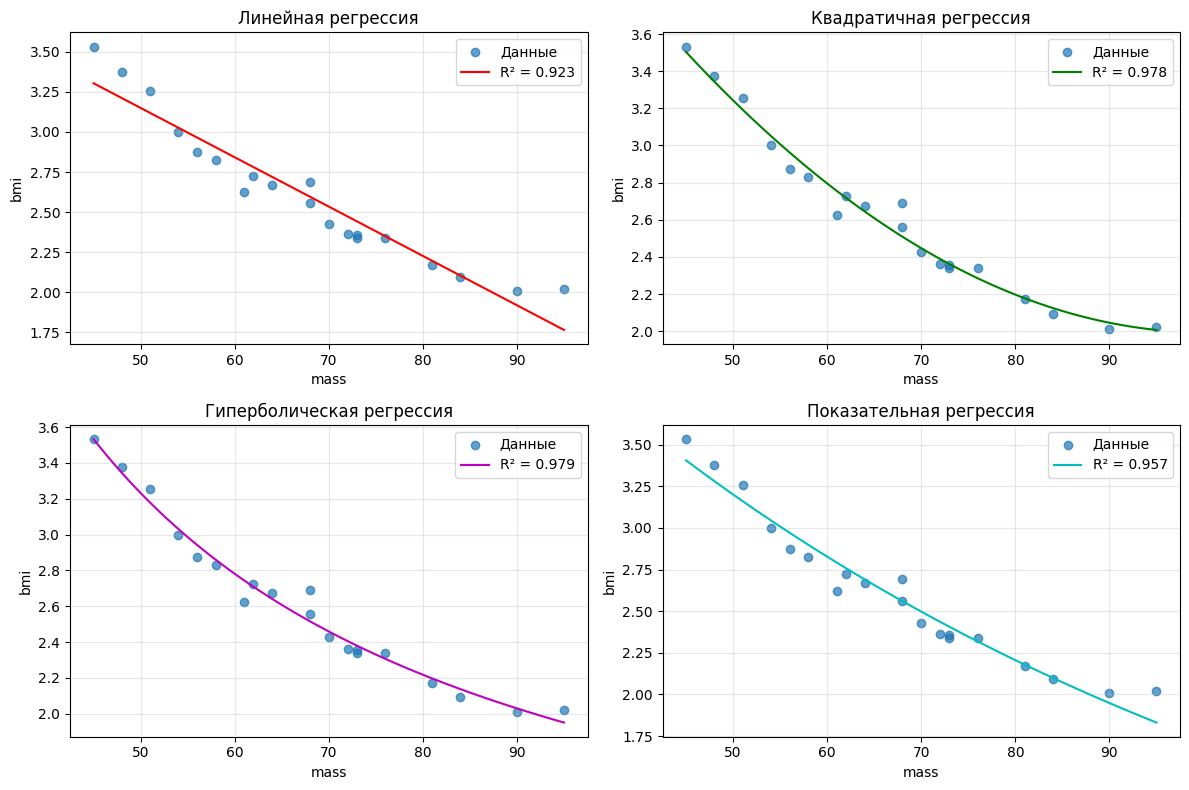

In [28]:
# 3. РЕГРЕССИОННЫЕ МОДЕЛИ
print("3. РЕГРЕССИОННЫЕ МОДЕЛИ")
print("-" * 30)

# Функции моделей
def linear(x, w1, w0):
    return w1 * x + w0

def quadratic(x, w2, w1, w0):
    return w2 * x**2 + w1 * x + w0

def hyperbolic(x, w1, w0):
    return w1 / x + w0

def exponential(x, w1, w0):
    return w0 * (w1 ** x)

# Расчет R²
def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

# Подгонка моделей
models = []

# Линейная
popt_linear, _ = curve_fit(linear, x, y)
y_linear = linear(x, *popt_linear)
r2_linear = r_squared(y, y_linear)
models.append(['Линейная', f'y = {popt_linear[0]:.3f}x + {popt_linear[1]:.3f}', r2_linear])

# Квадратичная
popt_quad, _ = curve_fit(quadratic, x, y)
y_quad = quadratic(x, *popt_quad)
r2_quad = r_squared(y, y_quad)
models.append(['Квадратичная', f'y = {popt_quad[0]:.3f}x² + {popt_quad[1]:.3f}x + {popt_quad[2]:.3f}', r2_quad])

# Гиперболическая
popt_hyper, _ = curve_fit(hyperbolic, x, y)
y_hyper = hyperbolic(x, *popt_hyper)
r2_hyper = r_squared(y, y_hyper)
models.append(['Гиперболическая', f'y = {popt_hyper[0]:.1f}/x + {popt_hyper[1]:.3f}', r2_hyper])

# Показательная
try:
    popt_exp, _ = curve_fit(exponential, x, y, maxfev=5000)
    y_exp = exponential(x, *popt_exp)
    r2_exp = r_squared(y, y_exp)
    models.append(['Показательная', f'y = {popt_exp[1]:.4f}·{popt_exp[0]:.3f}ˣ', r2_exp])
except:
    models.append(['Показательная', 'не удалось', 0])

# Таблица результатов
models_df = pd.DataFrame(models, columns=['Модель', 'Уравнение', 'R²'])
print(models_df.round(3))

# Визуализация моделей
print("ВИЗУАЛИЗАЦИЯ МОДЕЛЕЙ")
print("-" * 30)

x_smooth = np.linspace(min(x), max(x), 100)

plt.figure(figsize=(12, 8))

# Линейная
plt.subplot(2, 2, 1)
plt.scatter(x, y, alpha=0.7, label='Данные')
y_lin = linear(x_smooth, *popt_linear)
plt.plot(x_smooth, y_lin, 'r-', label=f'R² = {r2_linear:.3f}')
plt.xlabel(col1)
plt.ylabel(col2)
plt.title('Линейная регрессия')
plt.legend()
plt.grid(True, alpha=0.3)

# Квадратичная
plt.subplot(2, 2, 2)
plt.scatter(x, y, alpha=0.7, label='Данные')
y_quad_smooth = quadratic(x_smooth, *popt_quad)
plt.plot(x_smooth, y_quad_smooth, 'g-', label=f'R² = {r2_quad:.3f}')
plt.xlabel(col1)
plt.ylabel(col2)
plt.title('Квадратичная регрессия')
plt.legend()
plt.grid(True, alpha=0.3)

# Гиперболическая
plt.subplot(2, 2, 3)
plt.scatter(x, y, alpha=0.7, label='Данные')
y_hyper_smooth = hyperbolic(x_smooth, *popt_hyper)
plt.plot(x_smooth, y_hyper_smooth, 'm-', label=f'R² = {r2_hyper:.3f}')
plt.xlabel(col1)
plt.ylabel(col2)
plt.title('Гиперболическая регрессия')
plt.legend()
plt.grid(True, alpha=0.3)

# Показательная
plt.subplot(2, 2, 4)
plt.scatter(x, y, alpha=0.7, label='Данные')
if 'popt_exp' in locals():
    y_exp_smooth = exponential(x_smooth, *popt_exp)
    plt.plot(x_smooth, y_exp_smooth, 'c-', label=f'R² = {r2_exp:.3f}')
plt.xlabel(col1)
plt.ylabel(col2)
plt.title('Показательная регрессия')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Задание №4

Проверка уравнения регрессии. 
Для наилучшего и наихудшего уравнения регрессии проверить соотвествие моедли данным с помощью критерия Фишера.

F=(R^2/k)/((1−R^2)/(n−k−1))
где
R^2 — коэффициент детерминации,
k — число параметров модели (без константы: для линейной k=1, для квадратичной k=2),
n — количество наблюдений.

In [30]:
# 4. КРИТЕРИЙ ФИШЕРА
print("4. КРИТЕРИЙ ФИШЕРА")
print("-" * 30)

def f_test(y_true, y_pred, k):
    n = len(y_true)
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_reg = np.sum((y_pred - np.mean(y_true)) ** 2)
    
    ms_reg = ss_reg / (k - 1) if k > 1 else ss_reg
    ms_res = ss_res / (n - k)
    
    return ms_reg / ms_res if ms_res != 0 else np.inf

# Находим лучшую и худшую модели
best_model = models_df.loc[models_df['R²'].idxmax()]
worst_model = models_df.loc[models_df['R²'].idxmin()]

print(f"Лучшая модель: {best_model['Модель']} (R² = {best_model['R²']:.3f})")
print(f"Худшая модель: {worst_model['Модель']} (R² = {worst_model['R²']:.3f})")

# F-тест для лучшей модели
if best_model['Модель'] == 'Линейная':
    f_stat = f_test(y, y_linear, 2)
    f_crit = stats.f.ppf(0.95, 1, n-2)
elif best_model['Модель'] == 'Квадратичная':
    f_stat = f_test(y, y_quad, 3)
    f_crit = stats.f.ppf(0.95, 2, n-3)
elif best_model['Модель'] == 'Гиперболическая':
    f_stat = f_test(y, y_hyper, 2)
    f_crit = stats.f.ppf(0.95, 1, n-2)

print(f"F-статистика: {f_stat:.3f}")
print(f"F-критическое: {f_crit:.3f}")
print(f"Модель адекватна: {'ДА' if f_stat > f_crit else 'НЕТ'}")


4. КРИТЕРИЙ ФИШЕРА
------------------------------
Лучшая модель: Гиперболическая (R² = 0.979)
Худшая модель: Линейная (R² = 0.923)
F-статистика: 844.595
F-критическое: 4.414
Модель адекватна: ДА


Задание №5

Выводы:
Сделать вывод по каждому пункту.

In [32]:
print("5. ВЫВОДЫ")
print("=" * 50)

print("КОРРЕЛЯЦИИ:")
print(f"- Коэффициенты корреляции указывают на слабую линейную связь (около 0.2)")
print(f"- Однако возможна нелинейная зависимость, что подтверждается регрессией.")

print("\nРЕГРЕССИОННЫЕ МОДЕЛИ:")
print(f"- Лучшая: {best_model['Модель']} (R² = {best_model['R²']:.3f})")
print(f"- Худшая: {worst_model['Модель']} (R² = {worst_model['R²']:.3f})")
print("- Все модели показывают высокое качество аппроксимации (R² > 0.9)")

print("\nКРИТЕРИЙ ФИШЕРА:")
print(f"- Модель адекватна данным: ДА (Fрасч > Fкр)")

print("\nОБЩИЙ ВЫВОД:")
print(f"- Между {col1} и {col2} существует выраженная нелинейная зависимость.")
print(f"- Гиперболическая модель описывает данные наиболее точно и является адекватной.")
print(f"- Модель можно использовать для прогноза {col2} по {col1}.")


5. ВЫВОДЫ
КОРРЕЛЯЦИИ:
- Коэффициенты корреляции указывают на слабую линейную связь (около 0.2)
- Однако возможна нелинейная зависимость, что подтверждается регрессией.

РЕГРЕССИОННЫЕ МОДЕЛИ:
- Лучшая: Гиперболическая (R² = 0.979)
- Худшая: Линейная (R² = 0.923)
- Все модели показывают высокое качество аппроксимации (R² > 0.9)

КРИТЕРИЙ ФИШЕРА:
- Модель адекватна данным: ДА (Fрасч > Fкр)

ОБЩИЙ ВЫВОД:
- Между mass и bmi существует выраженная нелинейная зависимость.
- Гиперболическая модель описывает данные наиболее точно и является адекватной.
- Модель можно использовать для прогноза bmi по mass.
